<a href="https://colab.research.google.com/github/gmsft/csmath/blob/master/csmath_hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Homework02
Represent digits '3' in 2D.

# 1.准备数据

##下载原始数据

In [77]:
# !pwd
# !cd sample_data/
# !wget http://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tra
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def pre_data(number):
  df = pd.read_csv('/content/sample_data/optdigits.tra',header=None)
  # get all 3
  df = df[df.iloc[:,64]==number]
  # print(df)
  return df

## 生成矩阵

In [78]:
# 把给定的行转换为ndarray(8x8)
def getA3(df,row):
  s = df.iloc[row,:64]
  # print(s)
  arr = s.values.reshape(8,8)
  # plt.imshow(arr,cmap='gray')
  # print(type(arr))
  # print(arr)
  return arr
# x = getA3(df,0)

# 2.PCA


## 中心化（按列）

In [79]:
# 对x(ndarry类型)进行中心化；ax指定方向，默认按列
def centralize(x, ax=0):
  # x = getA3(df,0)
  # print(x)
  # np.mean(x,axis=0)
  avg = x.mean(axis=ax)
  # print(avg)
  centered = x-avg
  return centered
# A = centralize(x)

## 计算协方差矩阵

In [80]:
# A,样本矩阵
def covMatrix(A):
  # print(A)
  # print(A.T)
  cov = np.dot(A, A.T)/8
  return cov

# cov = covMatrix(A)

## 求协方差矩阵的特征值及特征向量

In [81]:
def get_v(cov):
  w,v = np.linalg.eig(cov)
  # print('特征值是：{},{}\n特征向量是：{},{}'.format(w.shape,w,v.shape,v))
  # print(w.re)
  return v

## 取前k个最大的特征值组成矩阵P

In [82]:
def getTopK(cov, k):
  new_cov = cov[0:k,:]
  return new_cov
# p = getTopK(v, 2)
# print(p)

## 降维后的数据y

In [83]:
# y = np.dot(p,x)
# print(y)

# 可视化降维后的数据

In [84]:
def visual(x, y):
  plt.figure(121)
  for i in y:
    plt.scatter(i[0,:],i[1,:])
  plt.xlabel('First Principal Componecnt')
  plt.ylabel('Second Principal Componecnt')
  plt.grid()
  
  plt.figure(122)
  for j in range(0,len(x)):
    plt.subplot(5,5,j+1)
    plt.imshow(x[j], cmap='gray')

  plt.show()
  return None


# 可视化数字

In [85]:
def visual_num(x):
  img_2_drawn = x
  
plt.show()

# 调用PCA

(389, 65)


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


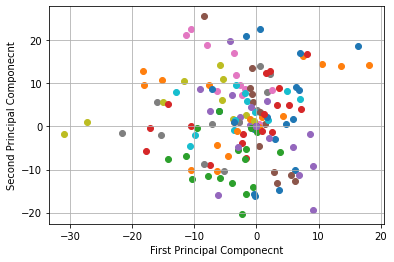

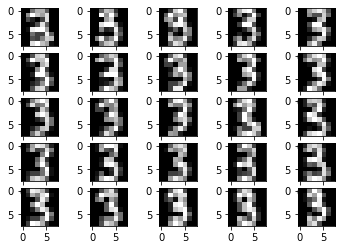

In [86]:
def my_pca(df, row, k):

  # 把其中的row行转化为8*8的ndarray
  # row = 0
  x = getA3(df,row)
  # 按列进行中心化
  n = centralize(x)
  # 计算协方差矩阵
  c = covMatrix(n)
  # 求协方差矩阵的特征向量
  v = get_v(c)
  # 使用topK个特征向量构造矩阵P
  # k = 2
  p = getTopK(v,k)
  # 进行数据降维
  y = np.dot(p, x)
  return x,y

# 获取数据，25个3，长度为64，每个元素值为0-16
number = 3
df = pre_data(number)
print(df.shape)
k = 2
img_2_drawn = []
after_pca_y = []
for r in range (25):
  x,y = my_pca(df,r,k)
  img_2_drawn.append(x)
  after_pca_y.append(y)

# 绘图
visual(img_2_drawn, after_pca_y)